In [9]:
# Dependencies
import pandas as pd
import requests
import matplotlib.pyplot as plt
api_key = "f14b5199"

url = "http://www.omdbapi.com/?apikey=" + api_key + "&t="

movies = ["Aliens", "Sing", "Moana","oihihi","John Wick: chapter 2","Monster's Ball","Forrest Gump","Top Gun","The Matrix","Avatar","American Beauty","The Terminal","Bird Cage","Jurassic World","Black Panther: Wakanda Forever","The Secret Life of Pets","Transformers: Dark of the Moon","Frozen","Toy Story 4","The Hunger Games","A THOUSAND WORDS","GOTTI","THE LAST DAYS OF AMERICAN CRIME","THE DISAPPOINTMENTS ROOM","MAX STEEL"]

responses = []
meta_score = []
imdb_score = []
boxoffice = []
genre = []

# Make a request to the OMDb API for each movie in the list.
for movie in movies:
    movie_data = requests.get(url + movie).json()
   
    try:
        mscore = movie_data["Metascore"]
        iscore = movie_data["imdbRating"]
        boffice = int((movie_data["BoxOffice"].replace('$', '')).replace(',', ''))
        mtype = movie_data["Genre"]
        print(f"{movie} is an {mtype} movie with a IMDB sorec of {iscore}, a Meta score of {mscore}, and made {boffice} at the box office")
        print("---------------------")
        meta_score.append(mscore)
        imdb_score.append(iscore)
        boxoffice.append(boffice)
        genre.append(mtype)
    except:
        print(f"{movie} not found")
        print("---------------------")
        pass
   


Aliens is an Action, Adventure, Sci-Fi movie with a IMDB sorec of 8.4, a Meta score of 84, and made 85160248 at the box office
---------------------
Sing is an Animation, Comedy, Family movie with a IMDB sorec of 7.1, a Meta score of 59, and made 270578425 at the box office
---------------------
Moana is an Animation, Adventure, Comedy movie with a IMDB sorec of 7.6, a Meta score of 81, and made 248757044 at the box office
---------------------
oihihi not found
---------------------
John Wick: chapter 2 is an Action, Crime, Thriller movie with a IMDB sorec of 7.4, a Meta score of 75, and made 92029184 at the box office
---------------------
Monster's Ball is an Drama, Romance movie with a IMDB sorec of 7.1, a Meta score of 69, and made 31273922 at the box office
---------------------
Forrest Gump is an Drama, Romance movie with a IMDB sorec of 8.8, a Meta score of 82, and made 330455270 at the box office
---------------------
Top Gun is an Action, Drama movie with a IMDB sorec of 6.9, 

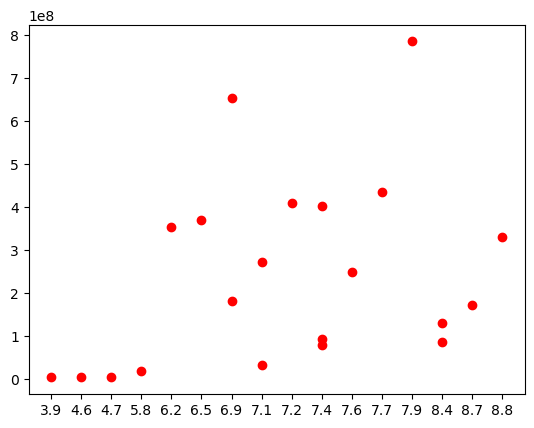

In [12]:
#IMDB Score vs Block Office Success
#Create dataframe with sorted IMDB scores
per_IMDB_score = pd.DataFrame({"IMDB Score":imdb_score,"Box Office Earnings":boxoffice})
sorted_IMBD_score = per_IMDB_score.sort_values("IMDB Score", ascending = True)
sorted_IMBD_score

#Plot IMDB scores vs earnings
plt.scatter(sorted_IMBD_score.iloc[:,0],sorted_IMBD_score.iloc[:,1],marker = "o", color = "red")

In [13]:
genre

['Action, Adventure, Sci-Fi',
 'Animation, Comedy, Family',
 'Animation, Adventure, Comedy',
 'Action, Crime, Thriller',
 'Drama, Romance',
 'Drama, Romance',
 'Action, Drama',
 'Action, Sci-Fi',
 'Action, Adventure, Fantasy',
 'Drama',
 'Comedy, Drama, Romance',
 'Action, Adventure, Sci-Fi',
 'Animation, Adventure, Comedy',
 'Action, Adventure, Sci-Fi',
 'Animation, Adventure, Comedy',
 'Animation, Adventure, Comedy',
 'Action, Adventure, Sci-Fi',
 'Comedy, Drama, Fantasy',
 'Biography, Crime, Drama',
 'Drama, Horror, Thriller',
 'Action, Adventure, Fantasy']